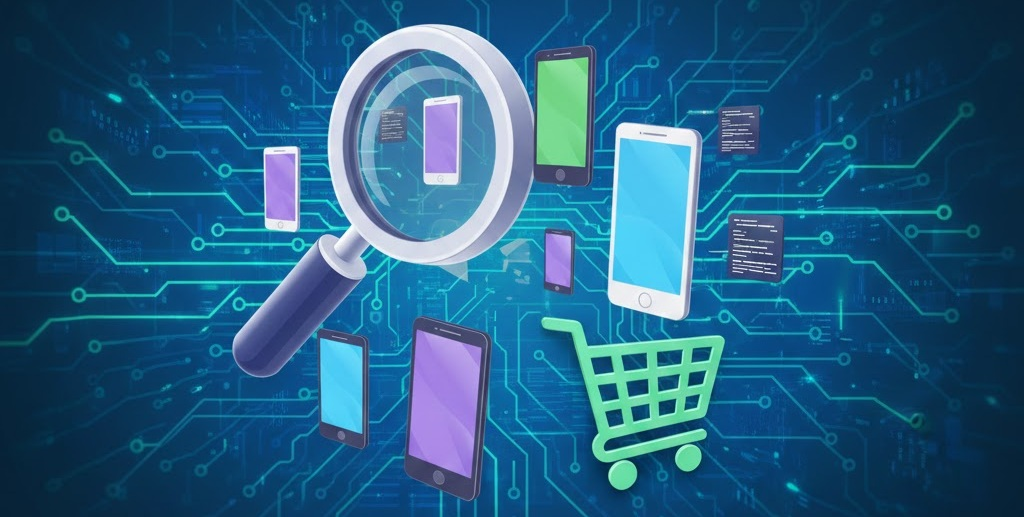

In [1]:
from IPython.display import Image, display
display(Image("../img/smartphone.jpg"))

# Ejemplo de WebScraping (MediaMarkt) - únicos fines educativos - Enero 2026

Descripción del ejercicio

En este Jupyter Notebook se presenta un ejemplo práctico de web scraping aplicado al sitio web de MediaMarkt, desarrollado con fines estrictamente educativos.

El ejercicio consiste en extraer información básica de los productos, concretamente:

El nombre del producto

El precio

La fecha de extracción de los datos

La información obtenida se almacena en un conjunto de datos (dataset) que permite, en ejecuciones posteriores, actualizar o enriquecer los datos, incorporando precios recogidos en diferentes momentos para analizar su evolución temporal.

Debe tenerse en cuenta que el código es susceptible a cambios, ya que cualquier modificación en la estructura de la página web (HTML, clases CSS, identificadores, etc.) puede requerir ajustes en el código para que el proceso de extracción continúe funcionando correctamente.

🤔 ¿Qué es exactamente BeautifulSoup?

BeautifulSoup es una herramienta para “leer” y “buscar cosas dentro del HTML” de una página web.

👉 Piensa en esto:

Selenium 👉 abre la web, hace clics, espera a que cargue (como si fueras tú).

BeautifulSoup 👉 lee el código HTML de esa web y te permite buscar datos concretos dentro de él.

Es como si Selenium fuera un libro, y BeautifulSoup el índice.

In [ ]:
# ===============================
# IMPORTACIONES
# ===============================

# Selenium sirve para abrir y controlar un navegador web automáticamente
from selenium import webdriver
# Service permite gestionar el servicio de ChromeDriver
from selenium.webdriver.chrome.service import Service
# By se usa para localizar elementos en la página (por clase, id, etc.)
from selenium.webdriver.common.by import By
# ChromeDriverManager descarga automáticamente el driver de Chrome
from webdriver_manager.chrome import ChromeDriverManager
# BeautifulSoup sirve para leer y buscar información dentro del HTML
from bs4 import BeautifulSoup
# Pandas se usa para crear y manejar tablas de datos (DataFrames)
import pandas as pd
# Datetime sirve para trabajar con fechas
from datetime import datetime
# Time se usa para hacer pausas (sleep)
import time


# Guardamos la fecha actual en formato YYYY-MM-DD
# Esto nos sirve para saber cuándo se recogieron los datos
fecha_scrapeo = datetime.today().strftime("%Y-%m-%d")

# ===============================
# INICIALIZAR SELENIUM

# Configuración del navegador Chrome
options = webdriver.ChromeOptions()

# Modo headless = el navegador se ejecuta sin mostrarse en pantalla
# Si quieres ver el navegador, comenta o elimina esta línea
options.add_argument("--headless")

# Creamos el navegador Chrome usando Selenium
driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
)

# ===============================
# LISTAS PARA GUARDAR DATOS
productos = []

precios = []

fechas = []

# ===============================
# CONFIGURACIÓN DEL SCRAPING

# Número máximo de productos que queremos recoger
limite_productos = 50
# Empezamos en la página 1
pagina = 1


# ===============================
# BUCLE PRINCIPAL

# Seguimos scraping mientras no lleguemos al límite de productos
while len(productos) < limite_productos:

    # Construimos la URL de la página actual
    url = f"https://www.mediamarkt.es/es/category/smartphones-263.html?page={pagina}"
    # Abrimos la página con Selenium
    driver.get(url)
    # Esperamos unos segundos para que la página cargue correctamente
    time.sleep(3)
    # Obtenemos el HTML de la página ya cargada
    soup = BeautifulSoup(driver.page_source, "html.parser")
    # Seleccionamos todos los bloques de productos
    articulos = soup.select("#mms-search-productlist > div")
    # Si no hay productos, significa que no hay más páginas
    if len(articulos) == 0:
        print(f"No hay productos en la página {pagina}. Fin del scraping.")
        break


    # Recorremos cada producto encontrado en la página
    for article in articulos:

        # Si ya hemos llegado al límite, salimos del bucle
        if len(productos) >= limite_productos:
            break

        # Buscamos el nombre del producto
        nombre_tag = article.select_one("article > div > div > a")

        # Buscamos el precio del producto
        precio_tag = article.select_one(
            "article > div > div > div.sc-fe32a722-0.twcst > div > div > div.sc-637a2157-0.cMWysk.notranslate > span.sc-1c706312-0.efiDdC"
        )

        # Si encontramos nombre y precio (para evitar errores)
        if nombre_tag and precio_tag:
            # Guardamos el texto limpio del nombre
            productos.append(nombre_tag.text.strip())

            # Guardamos el precio
            precios.append(precio_tag.text.strip())

            # Guardamos la fecha del scraping
            fechas.append(fecha_scrapeo)

    # Mostramos información de progreso
    print(f"Página {pagina} scrapeada, productos acumulados: {len(productos)}")

    # Pasamos a la siguiente página
    pagina += 1


# ===============================
# CERRAR EL NAVEGADOR
# ===============================

# Cerramos el navegador cuando terminamos
driver.quit()


# ===============================
# CREAR DATAFRAME
# ===============================

# Creamos una tabla con Pandas usando las listas
df = pd.DataFrame({
    "producto": productos,
    "precio": precios,
    "fecha": fechas
})

# Mostramos los primeros 20 productos
print(df.head(20))

# Mostramos el total de productos scrapeados
print(f"Total productos scrapeados: {len(df)}")


# ===============================
# GUARDAR EN CSV
# ===============================

# Guardamos los datos en un archivo CSV
df.to_csv("smartphones_mediamarkt.csv", index=False)


In [ ]:
# Revisar HTML y selectores CSS/XPath: pueden cambiar y romper el código.

# Comprobar contenido dinámico: algunas páginas cargan datos con JavaScript y necesitan esperas.

# Verificar URLs, paginación y formatos de datos: precios, fechas o enlaces pueden actualizarse.

In [2]:
df.head()

,producto,precio,fecha
0,"Apple iPhone 17 Pro, Azul oscuro, 256 GB, 5G, ...","1289,00€",2026-01-09
1,"Móvil - Samsung Galaxy S25 Ultra, Titanium Bla...","999,00€",2026-01-09
2,"Móvil - Google Pixel 9, Obsidiana, 128 GB, 12 ...","499,00€",2026-01-09
3,"Móvil - Samsung Galaxy A17 LTE, Negro, 256 GB,...","199,00€",2026-01-09
4,"Móvil - Samsung Galaxy A56 5G, Negro, 256 GB, ...","399,00€",2026-01-09


* Para una fecha posterior, habría que guardar el df inicial en un csv, y en el segundo scrapeo cargarlo. Por eso en este ejemplo la fecha inicial
y la fecha post es la misma.

In [ ]:
#ACTUALIZAR ESOS PRECIOS

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from datetime import datetime
import time

# Fecha del scrapeo
fecha_scrapeo = datetime.today().strftime("%Y-%m-%d")

# Inicializar Selenium
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # quitar si quieres ver el navegador
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# El DataFrame existente
# df["producto"] ya tiene los 50 productos que quieres
precios_encontrados = {p: None for p in df["producto"]}

# Set de productos que faltan por encontrar
productos_restantes = set(df["producto"])

# Número de página inicial
pagina = 1
MAX_PAGINAS = 200  # límite de seguridad para no recorrer toda la web

while productos_restantes and pagina <= MAX_PAGINAS:
    url = f"https://www.mediamarkt.es/es/category/smartphones-263.html?page={pagina}"
    driver.get(url)
    time.sleep(2)  # esperar a que cargue
    
    soup = BeautifulSoup(driver.page_source, "html.parser")
    articulos = soup.select("#mms-search-productlist > div")
    
    if not articulos:  # no hay más páginas
        break
    
    for article in articulos:
        nombre_tag = article.select_one("article > div > div > a")
        precio_tag = article.select_one(
            "article > div > div > div.sc-fe32a722-0.twcst > div > div > div.sc-637a2157-0.cMWysk.notranslate > span.sc-1c706312-0.efiDdC"
        )
        
        if nombre_tag and precio_tag:
            nombre_web = nombre_tag.text.strip()
            precio_web = precio_tag.text.strip()
            
            # Buscar coincidencia con los productos restantes
            for prod in list(productos_restantes):  # iterar sobre copia del set
                if prod.lower() in nombre_web.lower():  # coincidencia substring
                    precios_encontrados[prod] = precio_web
                    productos_restantes.remove(prod)
                    print(f"Encontrado: {prod} -> {precio_web}")
    
    pagina += 1

driver.quit()

# Añadir columnas nuevas al DataFrame existente
df["precio_post"] = df["producto"].map(precios_encontrados)
df["fecha_post"] = fecha_scrapeo

print(df)


Encontrado: Apple iPhone 17 Pro, Azul oscuro, 256 GB, 5G, 6.3 " OLED Super Retina XDR, Chip A19 Pro, iOS -> 1289,00€
Encontrado: Móvil - Samsung Galaxy S25 Ultra, Titanium Black, 256 GB, 12 GB RAM, 6.9" WQHD+, Snapdragon 8, 5000 mAh, Android 15 -> 999,00€
Encontrado: Móvil - Google Pixel 9, Obsidiana, 128 GB, 12 GB RAM, 6.3" Actua OLED, Google Tensor G4, 4700 mAh, Android 14 -> 499,00€
Encontrado: Móvil - Samsung Galaxy A17 LTE, Negro, 256 GB, 8 GB RAM, 6.7", FHD+ Super AMOLED, Mediatek G99 Octa-core, 5000 mAh, Android 15 -> 199,00€
Encontrado: Móvil - Samsung Galaxy A56 5G, Negro, 256 GB, 8 GB RAM, 6.7"  FHD+ Super AMOLED, Exynos 1580, 5000 mAh, Android 15 -> 399,00€
Encontrado: Apple iPhone 16e, Negro, 128 GB, 5G, 6.1 " OLED Super Retina XDR, Chip A18, iOS -> 579,00€
Encontrado: Apple iPhone 17 Pro, Plata, 256 GB, 5G, 6.3 " OLED Super Retina XDR, Chip A19 Pro, iOS -> 1289,00€
Encontrado: Móvil - Google Pixel 9a, Obsidiana, 128 GB, 8 GB RAM, 6.3" Actua pOLED, Google Tensor G4, 5100 mA

In [21]:
df.head()

,producto,precio,fecha,precio_post,fecha_post
0,"Apple iPhone 17 Pro, Azul oscuro, 256 GB, 5G, ...","1289,00€",2026-01-09,"1289,00€",2026-01-09
1,"Móvil - Samsung Galaxy S25 Ultra, Titanium Bla...","999,00€",2026-01-09,"999,00€",2026-01-09
2,"Móvil - Google Pixel 9, Obsidiana, 128 GB, 12 ...","499,00€",2026-01-09,"499,00€",2026-01-09
3,"Móvil - Samsung Galaxy A17 LTE, Negro, 256 GB,...","199,00€",2026-01-09,"199,00€",2026-01-09
4,"Móvil - Samsung Galaxy A56 5G, Negro, 256 GB, ...","399,00€",2026-01-09,"399,00€",2026-01-09
